In [1]:
import torch
import numpy as np

In [116]:
def get_mean():
    x = torch.empty(1, 10).uniform_(1, 5).numpy().reshape(10, )
    return x

In [117]:
get_mean()

array([4.3890543, 2.605564 , 3.937643 , 3.9009042, 1.6589837, 3.0091898,
       4.3143396, 2.9928963, 3.472393 , 2.395623 ], dtype=float32)

In [118]:
# Get reward with mean, there are total 10 action -> 10 means
def get_reward(mean):
    return torch.empty(1, 1).normal_(mean, std = 1).reshape(-1).numpy().item()
get_reward(5)

5.551638603210449

In [112]:
import random
def get_action(Q_t, epsilon):
    x = np.random.uniform(0, 1)
    if x > epsilon:
        return np.argmax(Q_t)
    else:
        return random.choice(list(range(0, 10)))
    
Q_t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
epsilon = 0.5
get_action(Q_t, epsilon)

3

In [142]:
step_size = 0.1
num_steps = 5000
def get_reward_list(epsilon):
    Q_t = np.zeros(shape = (10, ))
    total_reward = []
    for i in range(num_steps):
        means = get_mean()
        action = get_action(Q_t, epsilon)
        reward = get_reward(means[action])
        Q_t[action] = step_size * reward + (1 - step_size)*Q_t[action]
        total_reward.append(np.mean(Q_t))
    return total_reward
def get_mean_reward(epsilon, num_list):
    result = []
    for i in range(num_list):
        result.append(get_reward_list(epsilon))
    result = np.mean(result, axis = 0)
    return result


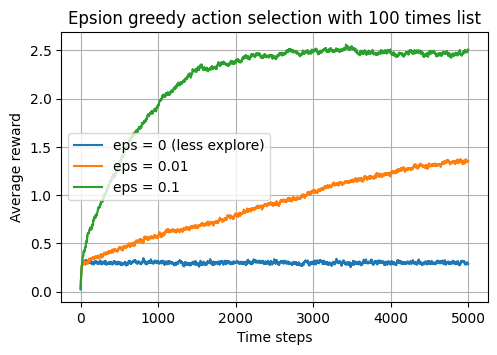

In [157]:
from matplotlib import pyplot as plt

plt.figure(figsize = (5.5, 3.5))
num_list = 100
plt.title("Epsion greedy action selection with 100 times list")
plt.plot(list(range(0, num_steps)), get_mean_reward(0, 10))
plt.plot(list(range(0, num_steps)), get_mean_reward(0.01, 10))
plt.plot(list(range(0, num_steps)), get_mean_reward(0.1, 10))
plt.legend(["eps = 0 (less explore)", "eps = 0.01", "eps = 0.1"])
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Average reward")
plt.show()